# **EE214 Machine Learning Basics and Practices**

- You should fill in all the blanks and follow all the TODO list in this file. 

- You don't need to annotate on your code. But please write descriptions of your source code and answers to the given questions in the report. There is no limit to the format of your report.

- You should **submit both the ipynb file and the report**. **Otherwise, you can't get a full score.**

- The name of zip file should be **Project1_studentID_Name**. You can submit it through KLMS. **Submission due is 4/17(Mon) 11:59 p.m.**

- Please send me the late submission via email (dy.kim@kaist.ac.kr). Our late submission penalty is as follows:

    **0 hours ~ 3 hours: 90%**

    **3 hours ~ 6 hours: 80%**

    **6 hours ~ 12 hours: 70%**

    **12 hours ~ 24 hours: 50%**

    **24 hours ~ : 0%**

- If you have further questions, please let TAs know




## **Mini-Assignment 1**

## Objective
* Part 1. Bias and Variance
* Part 2. PCA


## **Part1.** Bias and Variance
* The objective of this part is to understand regression and bias-variacne trade off.
* Use numpy library.
* You can refer to lecture note 'Week 1b,3 Classification & Regression'.

## Step 1 : Linear Regression
- Let's suppose variables $x,y$ have a linear relationship with some observation noise: $y = 3 x + 7 + noise(\epsilon)$
- We want to predict $y$ when given new $x$ using linear regression.
- Find weights ${w_1}, {w_0}$ that makes $f(x, \boldsymbol{w})$ close to observation $y$.

$$f(x, \boldsymbol{w})=w_{0}+w_{1} x $$
- The below code is provided to understand how to fit linear regression model to datasets.
- We will use `sklearn.linear_model.LinearRegression` to fit dataset. If you want to read more information, see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [101]:
import numpy as np
import matplotlib.pyplot as plt

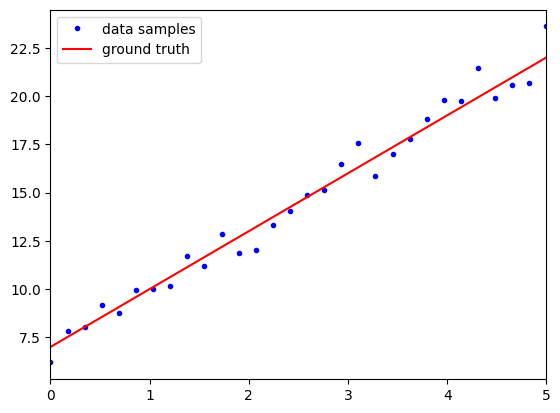

In [102]:
#generate linear samples
def linear_sample(sample_size, interval, noise=1., seed=1000):
  np.random.seed(seed)
  x = np.linspace(*interval, sample_size)
  ground_truth = 3 * x + 7
  y = ground_truth + np.random.randn(x.size) * noise
  return x, y, ground_truth

#sample size and the range of x is (0,5)
sample_size = 30
interval = (0, 5)

#plot data samples and ground truth
x, y, ground_truth = linear_sample(sample_size, interval)
plt.plot(x, y, 'b.', label='data samples')
plt.plot(x, ground_truth, 'r', label='ground truth')
plt.xlim(*interval)
plt.legend()
plt.show()

w1: 3.094
w0: 6.811


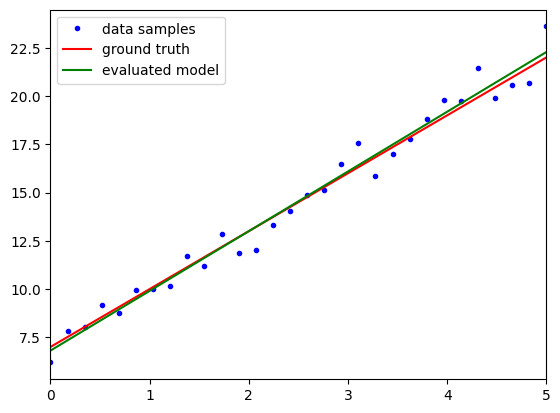

In [103]:
#Use sklearn.linear_model.LinearRegression to fit dataset.
from sklearn.linear_model import LinearRegression

#Fit model
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1,1),y)
print(f'w1: {linear_model.coef_[0]:.4}')
print(f'w0: {linear_model.intercept_:.4}')

#Predict model
sample_size = 10
interval = (0, 5)
new_x = np.linspace(*interval, sample_size)
y_pred = linear_model.predict(new_x.reshape(-1,1))

#plot
plt.plot(x, y, 'b.', label='data samples')
plt.plot(x, ground_truth, 'r', label='ground truth')
plt.plot(new_x, y_pred, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

## Step 2-1 : Polynomial Regression
### **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report. Also, answer the following questions in your report.

- Now, let's suppose variables $x, y$ have non-linear relationship with some observation noise. 
$$y = 3.6 \sin(2.4 x) + \epsilon$$

- Use same linear regression method used in step1, and check the result.


### **Q**. Is it good choice to use linear regression or not? Write the answer and reason in your report.



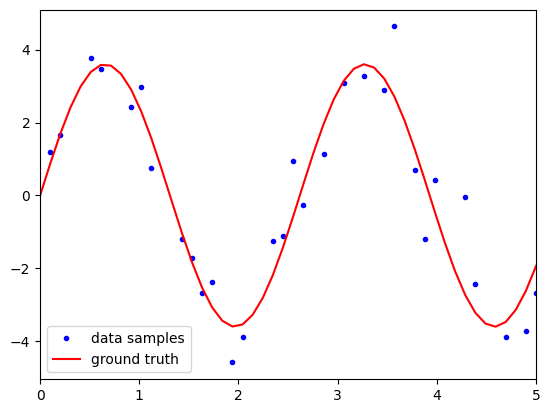

In [104]:
def ground_truth_poly(x):
    return 3.6 * np.sin(2.4 * x)

def nonlinear_sample(sample_size, interval, func, noise=1., seed=1000):
  np.random.seed(seed)
  x = np.linspace(*interval, 50)
  ground_truth = func(x)
  y = ground_truth + np.random.randn(x.size) * noise
  idxs = np.sort(np.random.choice(50, sample_size, replace=False))
  return x[idxs], y[idxs], (x, ground_truth)

sample_size = 30
interval = (0, 5)

x, y, ground_truth = nonlinear_sample(sample_size, interval, ground_truth_poly)
plt.plot(x, y, 'b.', label='data samples')
plt.plot(*ground_truth, 'r', label='ground truth')
plt.xlim(*interval)
plt.legend()
plt.show()

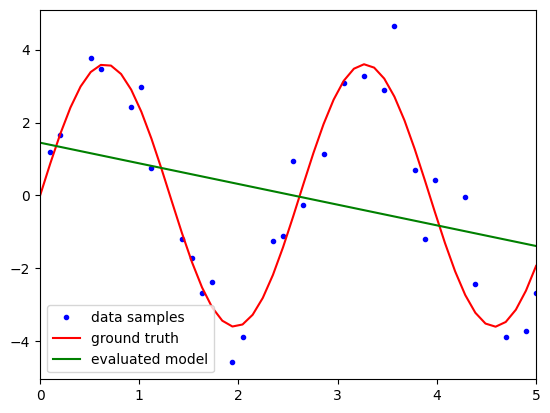

In [105]:
from sklearn.linear_model import LinearRegression

# Define linear_model and fit linear_model with x,y
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1,1),y)

# Predict y_pred with new_x
sample_size = 30
interval = (0,5)
new_x = np.linspace(*interval, sample_size)
y_pred = linear_model.predict(new_x.reshape(-1,1))

# plot
plt.plot(x, y, 'b.', label='data samples')
plt.plot(*ground_truth, 'r', label='ground truth')
plt.plot(new_x, y_pred, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

- Instead of linear regression, we will use polynomial regression. Polynomial regression is a form of regression analysis in which the relationship between the $x$ and $y$ is modeled as an $n^{\text{th}}$ degree polynomial in $x$.
- Polynomial regression is fitting a curve, so that we can predict a $y$ value for any $x$ value.

$$f(x, \boldsymbol{w})=w_{0}+w_{1} x+w_{2} x^{2}+\cdots+w_{M} x^{M}$$

- Make polynomial form $X_i = (1 , x_{i} , x_{i}^{2} , \dots , x_{i}^{n})$ for each sample $x_{i}$. ($n$ is degree)
    - You can use `PolynomialFeatures` to generate polynomial form as in the example below.


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = 3
sample_x = np.array([1,2,3])
poly = PolynomialFeatures(degree)
poly.fit_transform(sample_x.reshape(-1,1))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

- Define `fit_polynomial` to fit a polynomial model with given input samples $x, y$. 
- First, referring to the example above, change $x$ to the polynomial form $X$.
- And, define a linear regression model and fit the model with $X,y$ as above.
- Finally, return the fitted model.

In [9]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial model with the input samples x.
    (x, y): input sample
    degree: polynomial degree
    output : model
    '''
    #------------ Blank -------------------------
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(x.reshape(-1,1))
    #--------------------------------------------
    model = LinearRegression()
    model.fit(X, y)
    return model

- After fitting the model, evaluate the fitted polynomial model with input sample $x$. 
- To this end, define `evaluate_polynomial` to predict $y$ given $x$ using given model (you should convert $x$ to **polynomial form $X$**).


In [10]:
def evaluate_polynomial(model, x):
    '''
    Evaluate a fitted polynomial model with input sample x
    model: fitted polynomial model
    x: samples to be evaluated
    output : y
    '''
    degree = model.coef_.size - 1
    
    #------------ Blank -------------------------
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(x.reshape(-1,1))
    #--------------------------------------------
    y = model.predict(X)
    return y

### **TODO** : **Attach the following result** in your report

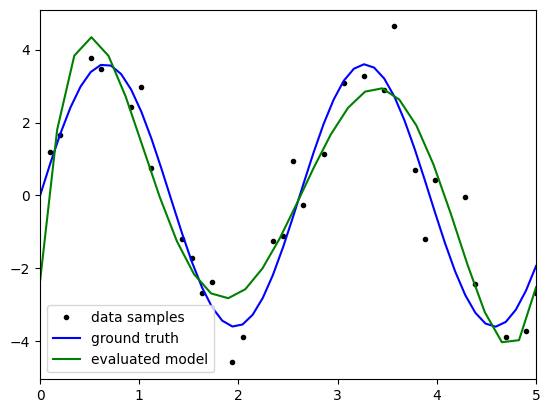

In [110]:
sample_size = 30
interval = (0, 5)
x, y, ground_truth = nonlinear_sample(sample_size, interval, ground_truth_poly)

degree = 6
model = fit_polynomial(x, y, degree)
p_y = evaluate_polynomial(model, new_x)

plt.plot(x, y, 'k.', label='data samples')
plt.plot(*ground_truth, 'b', label='ground truth')
plt.plot(new_x, p_y, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

### **Q**. Does the above trained curve (evaluated model) seem to fit the training samples well? If not, provide an explanation as to why this curve is not that satisfactory.



### **TODO** : Repeat the previous process by selecting a proper value of "degree" parameter so that the obtained fitted curve is *reasonably* close to the ground truth, and attach the results in your report.

## Step 2-2 : Regression with Gaussian basis

- We will use a different basis function (gaussian basis) in this step.

- Make gaussian form $X_i = (1 , \Phi_1(x_{i}) , \Phi_2(x_{i}) , \dots ,\Phi_n(x_{i}))$ for each sample $x_{i}$. ($n$ is degree)

$$\phi_{j}(x)=\exp \left\{- \frac{\left(x-\mu_{j}\right)^{2}}{2\sigma^{2}}\right\}$$
 


### **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report.

- Define `fit_gaussian` to fit a linear regression model with gaussian basis function.

- Note that set $\mu_i = i$ for all $i\in[1, 2, \dots n]$ when the degree$=n$ is given and set $\sigma$ as  $1.0$. 

In [35]:
from sklearn.linear_model import LinearRegression  

def fit_gaussian(x, y, degree):
    '''
    Fits a polynomial model with the input samples x.
    (x, y): input sample
    output : model
    '''
    #------------ Blank -------------------------
    X = np.ones((x.size, degree+1))
    for i in range(0,x.size):
      for j in range(1, degree+1):
        X[i][j] = np.exp(-0.5*(x[i]-j)**2)
    #--------------------------------------------

    model = LinearRegression()
    model.fit(X, y)
    return model

- And then, define `evaluate_gaussian` to predict $y$ given $x$ using given model (you should convert $x$ to **gaussian form $X$**).

In [36]:
def evaluate_gaussian(model, x):
    '''
    Evaluate a fitted polynomial model with input sample x
    model: fitted polynomial model
    x: samples to be evaluated
    output : y
    '''
    #------------ Blank -------------------------
    degree = model.coef_.size-1
    X = np.ones((x.size, degree+1))
    for i in range(0,x.size):
      for j in range(1, degree+1):
        X[i][j] = np.exp(-0.5*(x[i]-j)**2)
    #--------------------------------------------
    
    y = model.predict(X)
    return y

### **TODO** : **Attach the following result** in your report

- Suppose that we have the following ground truth function:
$$y = 1.8 \sin(1.1 x) + \epsilon$$

- For the simulation, the degree is set to be $10$ below, and let $\mu_i = i$ for all $i$. 

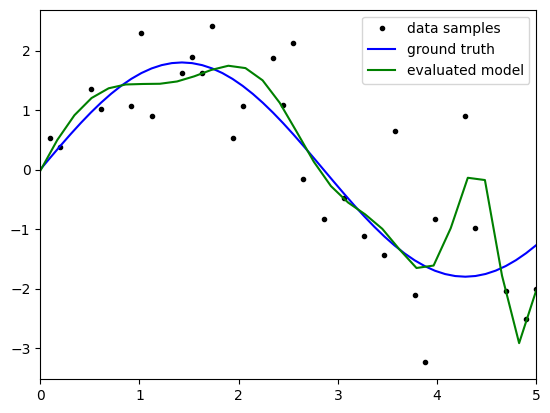

In [37]:
def ground_truth_gauss(x):
    return 1.8 * np.sin(1.1 * x)

sample_size = 30
interval = (0, 5)
x, y, ground_truth = nonlinear_sample(sample_size, interval, ground_truth_gauss)

degree = 10
model = fit_gaussian(x, y, degree)
p_y = evaluate_gaussian(model, new_x)

plt.plot(x, y, 'k.', label='data samples')
plt.plot(*ground_truth, 'b', label='ground truth')
plt.plot(new_x, p_y, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

### **Q.** Do you think this curve has a good ability to generalize on unseen test samples? If not, provide an explanation that supports your thoughts.



## Step 3. Linear Regression with Regularization

Overfitting often arises as some coefficients taking values that are too large in magnitude.
A simple way to check this behavior is to add a penalty term to the loss function:

$$J(\boldsymbol{w})= \frac{1}{2}\sum_{i=1}^{N}\left\{t_{i}-y\left(x_{i}, \boldsymbol{w}\right)\right\}^{2}+\frac{\lambda}{2}\|\boldsymbol{w}\|^{2}$$

### **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report. 

### Define a function for fitting a linear regression model with regularization

- Instead of `LinearRegression()`, **use `Ridge` regressor** which impose a penalty on the magnitude of the coefficients.
- Use **gaussian basis** as the basis function.
- Reference `Ridge` document : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


In [38]:
def fit_gaussian_reg(x, y, degree, lambda_, regressor):
    '''
    Evaluate a fitted gaussian model with regularization term
    model: fitted gaussian model
    x: samples to be evaluated
    lambda: regularization penalty
    '''
    #------------ Blank -------------------------
    X = np.ones((x.size, degree+1))
    for i in range(0,x.size):
      for j in range(1, degree+1):
        X[i][j] = np.exp(-0.5*(x[i]-j)**2)
    #--------------------------------------------
    
    model = regressor(alpha=lambda_)
    model.fit(X, y)
    return model

### **TODO** : In the following, choose a proper value of "lambda_" parameter so that the obtained fitted curve is *reasonably* close to the ground truth, and attach the results in your report.

- Do not modify the 'degree' parameter

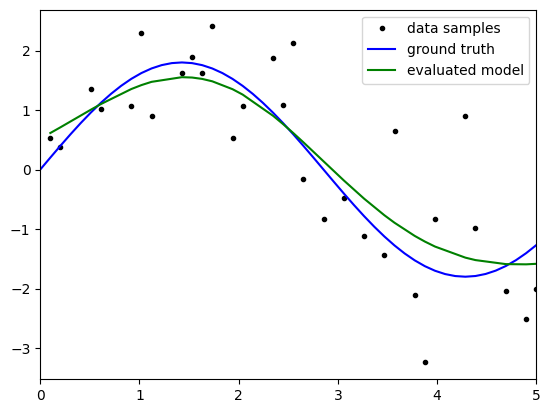

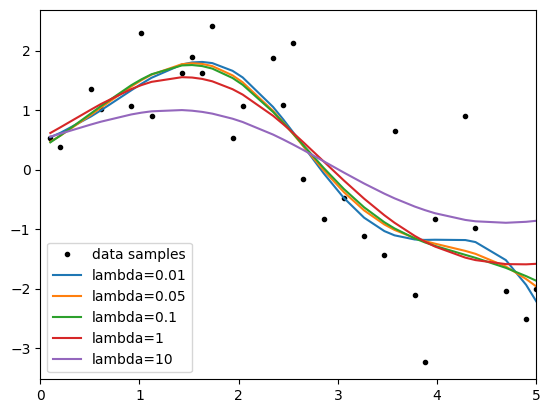

In [113]:
from sklearn.linear_model import Ridge

sample_size = 30
interval = (0, 5)
x, y, ground_truth = nonlinear_sample(sample_size, interval, ground_truth_gauss)

lambda_ = 1
degree = 10

model = fit_gaussian_reg(x, y, degree, lambda_, Ridge)
p_y = evaluate_gaussian(model, x)

plt.plot(x, y, 'k.', label='data samples')
plt.plot(*ground_truth, 'b', label='ground truth')
plt.plot(x, p_y, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

lambdas = [0.01,0.05 ,0.1, 1, 10]

plt.plot(x, y, 'k.', label='data samples')
for lambda_ in lambdas:
    model = fit_gaussian_reg(x, y, degree, lambda_, Ridge)
    p_y = evaluate_gaussian(model, x)

    plt.plot(x, p_y, label='lambda={}'.format(lambda_))
    
plt.xlim(*interval)
plt.legend()
plt.show()

## Step 4: Compute integrated squared bias and integrated variance

In this step, we will compute bias and variance of models trained on 
$100$ different datasets.
The average prediction is estimated from
\begin{equation}
\bar{y}(x) = \frac{1}{L} \sum_{l=1}^L y^{(l)} (x)
\end{equation} where $L$ is the number of datasets (i.e. the number of models to be trained for each dataset)

And the integrated squared bias and integrated variance are given by
\begin{align}
\text{(bias)}^2 \hspace{3mm}
= \hspace{3mm}
& \frac{1}{N} \sum_{n=1}^N \{ \bar{y}(x_n) - h(x_n) \}^2, \\
\text{variance} \hspace{3mm}
=\hspace{3mm}
 &  \sum_{l=1}^{L}\frac{1}{L}\sum_{n=1}^{N} \frac{1}{N} \{y^{(l)}(x_n) - \bar
{y} (x_n) \}^2.
\end{align}
where $N$ is the number of data points (specified by "sample_size"), $L$ is the number of datasets as aforementioned above (specified by "n_models"),
$y^{(l)}$ is $l^{\text{th}}$ model prediction function, and $h$ is the optimal prediction function (You can consider the "ground truth" as an optimal predictor $h$). 


### - Through the following code, you have to compute the integrated squared bias and integrated variance for various lambdas, using **a linear regression model with regularization** and plot them. 
### - Use **gaussian basis** as the basis function (use ```fit_gaussian_reg``` function implemented above and use Ridge as a 'regressor' argument.)
### - You can use the functions defined above for fitting and prediction (evaluation). 
### - Note that training samples are used for fitting and then test samples are used to compute the bias and variance.
### - Here $N$ and $L$ are set to $30$ and $100$, respectively.
### - When sampling trainsets (when using ```nonlinear_sample``` method for sampling training samples), **set the "noise" parameter as 1** and use ```ground_truth_gauss``` function for 'func' argument.

### **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report. Also, attach the result and answer the following questions in your report.


### **Q**. Write the relationship between lambda and bias, variance.
### **Q**. Find the best lambda value through the resulting plot and explain about it.

lambda:  0.0009118819655545166 squared_bias+variance:  0.21814047096379177
lambda:  0.0014643910485082185 squared_bias+variance:  0.2153368067516543
lambda:  0.0023516652636582877 squared_bias+variance:  0.2083842315833003
lambda:  0.0037765387311884816 squared_bias+variance:  0.19800441146712655
lambda:  0.006064742720220372 squared_bias+variance:  0.1928270629688653
lambda:  0.009739369004403387 squared_bias+variance:  0.18216162960147375
lambda:  0.015640450548327085 squared_bias+variance:  0.17053554709860255
lambda:  0.025116996105606543 squared_bias+variance:  0.1651294895298079
lambda:  0.040335378537834525 squared_bias+variance:  0.15749908349823305
lambda:  0.06477457554835706 squared_bias+variance:  0.14969549310315
lambda:  0.1040214766680376 squared_bias+variance:  0.1470689860159721
lambda:  0.1670480665692844 squared_bias+variance:  0.14199966106180412
lambda:  0.26826245346996097 squared_bias+variance:  0.13664157539293154
lambda:  0.43080261519743523 squared_bias+varian

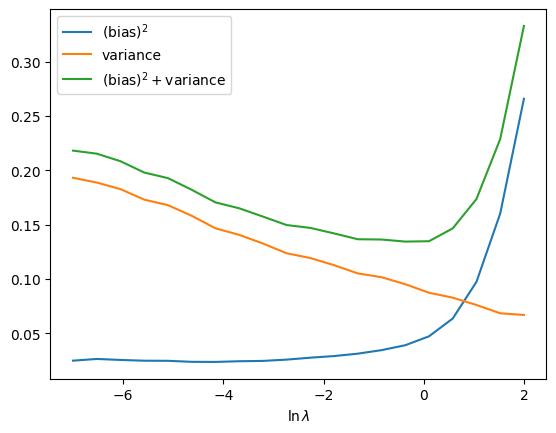

In [121]:
from numpy.linalg import norm

sample_size = 30
n_models = 100
linpenals = np.linspace(start=-7, stop=2, num=20) # Regularization parameter (lambda) = e^-7, e^-6, ..., e^1
lambdas = np.power(np.e, linpenals)
degree = 5

x_test, y_test, ground = nonlinear_sample(sample_size, interval, ground_truth_gauss, noise=2., seed=0) # Test samples
ground_truth = ground_truth_gauss(x_test)

squared_bias = []
variance = []

# Plot squared bias, variance and their sum according to the labmda.
for lambda_ in lambdas:
    #------------------ Blank -----------------------------------------
    avg_y = np.zeros(sample_size)
    models = []
    for i in range(n_models):
        x, y, _ = nonlinear_sample(sample_size, interval,ground_truth_gauss, noise=1., seed = np.random.randint(100)) 
        tmpmodel = fit_gaussian_reg(x, y,degree, lambda_,Ridge)
        p_y = evaluate_gaussian(tmpmodel, x_test)
        models.append(p_y)
  
    avgp_y = sum(models)/n_models
    bias_val = sum(np.square((avgp_y - ground_truth)))/sample_size 
    squared_bias.append(bias_val)
    
    var = 0
    for p_y in models:
        var = var + (norm(avgp_y - p_y) ** 2 / sample_size)
    variance.append(var / n_models)
    print("lambda: ",lambda_,"squared_bias+variance: ",bias_val+var/n_models)

plt.plot(linpenals, squared_bias, label='(bias)$^{2}$')
plt.plot(linpenals, variance, label='variance')
plt.plot(linpenals, np.array(squared_bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$\ln\lambda$')
plt.legend()
plt.show()


## Step 5: Repeat step 4 with own implemented Ridge regressor (```My_Ridge``` class) using pure Numpy.

### **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report.

- Set learning rate (```lr```) and number of iterations (```n_iters```) as 0.01 and 1000 respectively.
- Use full batch gradient descent algorithm based on the following objective function:

$$J(\boldsymbol{w})= \frac{1}{2}\sum_{i=1}^{N}\left\{t_{i}-y\left(x_{i}, \boldsymbol{w}\right)\right\}^{2}+\frac{\lambda}{2}\|\boldsymbol{w}\|^{2}$$

- Same as ```Ridge```, the weight $\boldsymbol{w}$ is assumed to be stored in the attribute ```self.coef_```

In [95]:
class My_Ridge:
    def __init__(self, alpha):
        self.lambda_ = alpha

    def fit(self, X, y, lr=0.01, n_iters=1000):
        _, coef_size = X.shape
        self.coef_ = np.random.randn(coef_size)  # initialize the weights

    #------------------ Blank -----------------------------------------
        for i in range(n_iters):
          size = _
          P = np.zeros(size)
          for j in range(size):
            P[j] = np.dot(self.coef_,X[j]-y[j])
          grad = np.matmul(P,X) + self.lambda_*self.coef_ #Obtaining dradient of the Loss function with Regularization
          self.coef_ -= grad*lr #update the gradient
    #------------------------------------------------------------------

    def predict(self, X):
        return np.dot(X, self.coef_)

### **TODO** : Repeat step 4 using the implemented ```My_Ridge``` and write your own description of the source code in your report.

### **Q**. Find the best lambda value through the resulting plot and explain about it.

In [ ]:
from numpy.linalg import norm

sample_size = 30
n_models = 100
linpenals = np.linspace(start=-7, stop=2, num=20) # Regularization parameter (lambda) = e^-7, e^-6, ..., e^1
lambdas = np.power(np.e, linpenals)
degree = 5

x_test, y_test, _ = nonlinear_sample(sample_size, interval, ground_truth_gauss, noise=2., seed=0) # Test samples
ground_truth = ground_truth_gauss(x_test)

squared_bias = []
variance = []

# Plot squared bias, variance and their sum according to the labmda.
for lambda_ in lambdas:
    #------------------ Blank -----------------------------------------
    avg_y = np.zeros(sample_size)
    models = []
    
    for i in range(n_models):
        x, y, _ = nonlinear_sample(sample_size, interval,ground_truth_gauss, noise=1., seed = np.random.randint(100)) 
        tmpmodel = fit_gaussian_reg(x, y,degree, lambda_,My_Ridge)
        p_y = evaluate_gaussian(tmpmodel, x_test)
        models.append(p_y)
  
    avgp_y = sum(models)/n_models
    bias_val = sum(np.square((avgp_y - ground_truth)))/sample_size 
    squared_bias.append(bias_val)
    
    var = 0
    for p_y in models:
        var = var + (norm(avgp_y - p_y) ** 2 / sample_size)
    variance.append(var / n_models)

    print(lambda_)

    #------------------------------------------------------------------

plt.plot(linpenals, squared_bias, label='(bias)$^{2}$')
plt.plot(linpenals, variance, label='variance')
plt.plot(linpenals, np.array(squared_bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$\ln\lambda$')
plt.legend()
plt.show()

0.0009118819655545166
0.0014643910485082185
0.0023516652636582877
0.0037765387311884816
0.006064742720220372
0.009739369004403387


## **Part2.** PCA

* Understand and Implement PCA in Iris dataset.
* Using numpy to make PCA and compare your PCA to PCA which made by using scikit-learn package


### **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report. 

### Step 1. Load Iris dataset


In [54]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

#visualization
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Step 2. Using numpy to implement PCA (with Iris dataset)

#### step 2-1 : Standardize the dataset

$$ z = \frac{(x- u)}{s} ~~~~~~\text{(feature-wise operation)}$$ 

$u$ is the sample mean and $s$ is standard deviation of the training samples

In [55]:
#step1: Standardization
#------------------ Blank -----------------------------
u = np.mean(iris_x,axis=0)
s = np.std(iris_x,axis=0)
z = (iris_x-u)/s
#------------------------------------------------------
print("The mean of z:", z.mean(0))

The mean of z: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


#### step 2-2 : Find the covariance matrix

$$ \operatorname{cov}(\mathbf{X})=\frac{1}{n-1} \mathbf{X}^{T} \mathbf{X} $$

Note that $\mathbf{X} \in \mathbb{R}^{n\times d}$ where $d$ is the number of feature dimensions and $n$ is the number of training samples.

In [56]:
#step2: Find the covariance matrix
n, _ = z.shape
covar_matrix = 1 / (n - 1) * np.dot(z.T, z)
print("The shape of covariance matrix: ",covar_matrix.shape)

The shape of covariance matrix:  (4, 4)


#### step 2-3 : Find the eigenvalues and eigenvectors of the covariance matrix

The principal components can be determined via eigen decomposition of the covariance matrix $\mathbf{C}$. \
$$\mathbf{C}=\mathbf{W} \mathbf{\Lambda} \mathbf{W}^{T} =
  \begin{bmatrix}
 \mathbb{w}_1 & \mathbb{w}_2 & \cdots & \mathbb{w}_d
  \end{bmatrix}
  \begin{bmatrix}
      \sigma_1 & 0 & \cdots & 0  \\
         0 & \sigma_2  & \cdots & 0  \\
         \vdots& \vdots &\ddots &\vdots   \\
         0 & 0 & \cdots & \sigma_d  \\
  \end{bmatrix}
  \begin{bmatrix}
    \mathbb{w}_1^T \\ \mathbb{w}_2^T \\ \vdots \\ \mathbb{w}_d^T
  \end{bmatrix}
$$


where $\mathbb{w}_i \in \mathbb{R}^{d}$ (for all $i$) are orthonormal vectors, i.e.,  $\mathbb{w}_i \cdot \mathbb{w}_j=0$ for all $i\neq j$, and $\Vert \mathbb{w}_i \Vert = 1$ for all $i$. Note that $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_d$.

$\mathbf{C}$ is covariance matrix,  $\mathbf{W}$ is matrix of eigenvectors, $\mathbf{\Lambda}$ is a diagonal matrix of m eigenvalues.\
The geometrical meaning of eigen decomposition is to find a new coordinate system of the eigenvectors for $\mathbf{C}$.


In [57]:
#step3 : Find the eigenvalues and eigenvectors of the covariance matrix
np.random.seed(214)
eig_vals, eig_vecs = np.linalg.eig(covar_matrix)

#### step 2-4 : Get eigenvectors of 2 biggest eigenvalues and form the projection matrix 

The first $k$ principal components (PC) explain the most variance any $k$ variables can explain. \
To express our dataset in $2$ dimensions, find eigenvectors of $2$ biggest eigenvalues. \
Then project the data points onto the first $k=2$ PCs as the representation of the data:

$$\mathbf{X}_{k}=\mathbf{X} \mathbf{W}_{k}$$

where $\mathbf{W}_{k} = \begin{bmatrix}
 \mathbb{w}_1 & \cdots & \mathbb{w}_k 
  \end{bmatrix} \in \mathbb{R}^{d \times k}$.

The ```Projected_X``` given in code block below is $\mathbf{X}_k \in \mathbb{R}^{n \times k}$

In [61]:
#step4 : Get first 2 eigenvectors of 2 biggest eigenvalues and form the projection matrix
#------------------ Blank -----------------------------
sorted_eig_vecs = eig_vecs
print(sorted_eig_vecs)
projected_X = np.matmul(z, sorted_eig_vecs[:, :2])
#------------------------------------------------------
print("first 2 eigenvectors:", sorted_eig_vecs[:,0], ',', sorted_eig_vecs[:,1])
print("The shape of projectection matrix: ", projected_X.shape)

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
first 2 eigenvectors: [ 0.52106591 -0.26934744  0.5804131   0.56485654] , [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
The shape of projectection matrix:  (150, 2)


#### step 2-5 : Get variance ratio
The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance.

In [62]:
#Step5 : get variance ratio
variance_ratio = eig_vals[:2]/eig_vals.sum()
print('first 2 eigenvalues:', eig_vals[:2])
print('variance_ratio:', variance_ratio)

first 2 eigenvalues: [2.93808505 0.9201649 ]
variance_ratio: [0.72962445 0.22850762]


### **TODO** : **Attach the following result** in your report

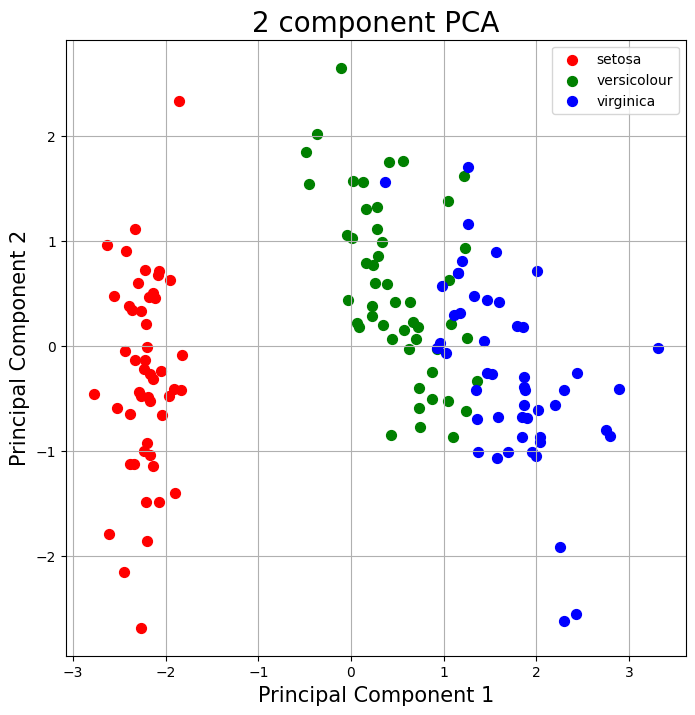

In [63]:
#Visualization
principalDf = pd.DataFrame(data=projected_X, columns=['principal component 1','principal component 2'])
principalDf['target'] = iris_y

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = {'setosa': 0, 'versicolour' : 1, 'virginica' : 2}
colors = ['r', 'g', 'b']
for target, color in zip(targets.values(),colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets.keys())
ax.grid()

### Step 2-6: Get eigenvectors and eigenvalues without using the ```np.linalg.eig()``` method.

- Refer to the power method: https://en.wikipedia.org/wiki/Power_iteration
- The following is the example code for obtaining the first principal component (eigenvector) and the corresponding eigenvalue.

In [64]:
from numpy.linalg import norm
np.random.seed(214)

d, d = covar_matrix.shape
first_eigvec = np.random.randn(d) # initialize

for i in range(20):
    first_eigvec = np.dot(covar_matrix, first_eigvec)
    first_eigval = norm(first_eigvec)
    first_eigvec = first_eigvec / first_eigval

print('first eigenvalue : ',first_eigval)
print('first eigenvector : ',first_eigvec)

first eigenvalue :  2.9380850501999953
first eigenvector :  [ 0.52106591 -0.26934744  0.5804131   0.56485654]


### **TODO (Optional)** : Think about the reason (not necessarily a rigorous mathematical reasoning) why the above algorithm, i.e., power method works.

### **TODO** :  Using the above example code and the fact that ```first_eigval``` converges to the largest eigenvalue $\sigma_1$, implement the code (fill in the blank of the following) for obtaining **second** eigenvector and the corresponding eigenvalue.

- Unrolling the covariance matrix $C$ in the following way would be helpful to your reasoning.

\begin{align}
\mathbf{C}=\mathbf{W} \mathbf{\Lambda} \mathbf{W}^{T} &=
  \begin{bmatrix}
 \mathbb{w}_1 & \mathbb{w}_2 & \cdots & \mathbb{w}_d
  \end{bmatrix}
  \begin{bmatrix}
      \sigma_1 & 0 & \cdots & 0  \\
         0 & \sigma_2  & \cdots & 0  \\
         \vdots& \vdots &\ddots &\vdots   \\
         0 & 0 & \cdots & \sigma_d  \\
  \end{bmatrix}
  \begin{bmatrix}
    \mathbb{w}_1^T \\ \mathbb{w}_2^T \\ \vdots \\ \mathbb{w}_d^T
  \end{bmatrix}\\
\end{align}


In [82]:
from numpy.linalg import norm
np.random.seed(214)

#------------------ Blank -----------------------------
fev = first_eigvec
feigval = first_eigval
x = np.ones(fev.shape)

x = (1/(fev[0]*feigval))*covar_matrix[:, :1]
x = x.reshape(4,1)
fev = fev.reshape(4,1)


P = np.matmul(fev, x.T)
G = covar_matrix - feigval * P
u2 = np.ones(d)

for i in range(20):
    u2 = np.dot(G.T, u2)
    second_eigval = norm(u2)
    u2 = u2/second_eigval


print("u2: ", u2)

second_eigvec = u2

#------------------------------------------------------

print('second eigenvalue : ',second_eigval)
print('second eigenvector : ',second_eigvec)


u2:  [0.37741762 0.92329566 0.02449161 0.06694199]
second eigenvalue :  0.9201649040377886
second eigenvector :  [0.37741762 0.92329566 0.02449161 0.06694199]


### **TODO** : **Attach the following result** in your report

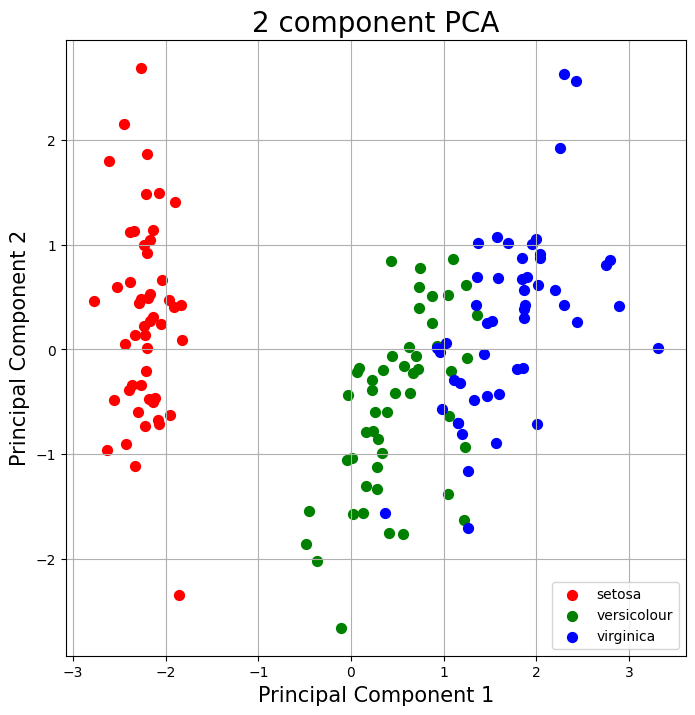

In [83]:
#Visualization
principal_comps = np.concatenate([first_eigvec[:, np.newaxis], second_eigvec[:, np.newaxis]], axis=1)
projected_X = z.dot(principal_comps)

principalDf = pd.DataFrame(data=projected_X, columns=['principal component 1','principal component 2'])
principalDf['target'] = iris_y

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = {'setosa': 0, 'versicolour' : 1, 'virginica' : 2}
colors = ['r', 'g', 'b']
for target, color in zip(targets.values(),colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets.keys())
ax.grid()

### Step 3. Using sklearn PCA package  (with Iris dataset)
### (Please refer https://scikit-learn.org/stable/user_guide.html and search to use proper methods)
#### step 3-1 : Standardization using ```sklearn.preprocessing.StandardScalar``` module



In [84]:
from sklearn.preprocessing import StandardScaler
#Step1. Standardization using StandardScaler
#------------------ Blank -----------------------------
scaler = StandardScaler().fit(iris_x)
z = scaler.transform(iris_x)
#------------------------------------------------------
print("The mean of z:", z.mean(axis=0))

The mean of z: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


#### step 3-2 : PCA projection to 2 components using ```sklearn.decomposition.PCA``` module

In [86]:
from sklearn.decomposition import PCA
#Step2. PCA projection to 2 components
#------------------ Blank -----------------------------
A = PCA(2)
principalComponents = A.fit(iris_x).transform(iris_x)
#------------------------------------------------------

### **TODO** : **Attach the following result** in your report

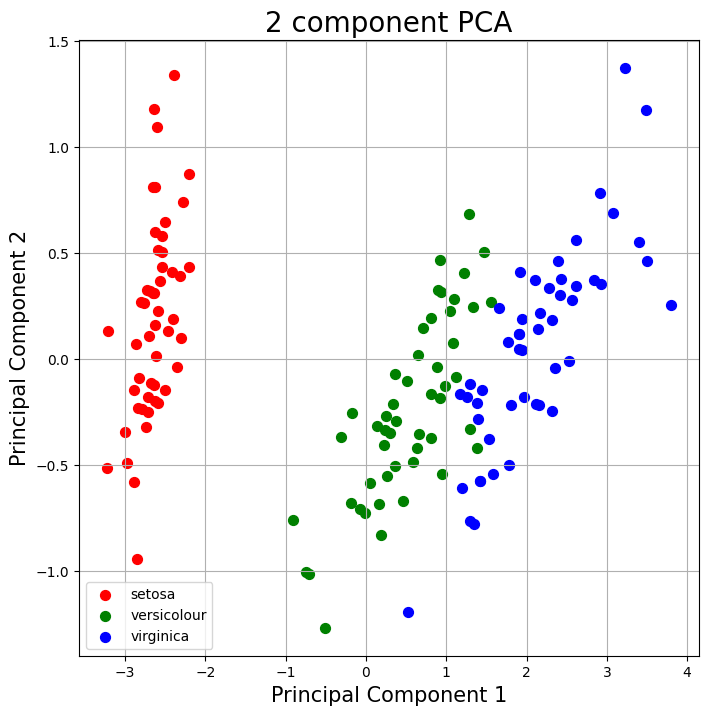

In [87]:
#Visualization
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1','principal component 2'])
principalDf['target'] = iris_y

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = {'setosa': 0, 'versicolour' : 1, 'virginica' : 2}
colors = ['r', 'g', 'b']
for target, color in zip(targets.values(),colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets.keys())
ax.grid()

### **TODO** : **Attach the following result** in your report

In [122]:
#Step3 : Get eigenvlaue and variance ratio of covariance matrix

print('eigen_value :', pca.explained_variance_)
print('explained variance ratio:', pca.explained_variance_ratio_)

eigen_value : [4.22824171 0.24267075]
explained variance ratio: [0.92461872 0.05306648]
